### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Linear Regression specific libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading and Understanding the dataset

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

 -  Data set has `730 rows` and `16 columns or features`
    
Checking the Feature info

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 -  We have 1 Object type column , 4 float and 11 integer type columns

### Data Preparation

#### Removing certain Unwanted features

- `Instant` column seems redundant as it seems to be row identifier.
- `dteday` is also redundant as we have separate year and month columns
- `Casual` and Registered seem to be the breakup of our target variable that is cnt

In [5]:
bike.drop(['instant','dteday','casual','registered'], axis = 1,inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
bike.shape

(730, 12)

#### Checking for and removing duplicate values if any

In [7]:
bike.drop_duplicates(inplace = True)
bike.shape

(730, 12)

 -  Shape of data set is unchaned after dropping duplicates whcich suggests that there were `no duplicates` in the dataset to begin with.

#### Checking for null values if any

In [8]:
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- None of the features have any null values.

Creating a new dataset `bike_new` and preserving the original dataset  `bike`

In [9]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [11]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_new.shape

(730, 12)

Renaming features `yr` to `year` & `mnth` to `month` and `hum` to `humidity` for readability and understanding

In [13]:
bike_new.rename(columns = {'yr':'year','mnth':'month','hum':'humidity'},inplace = True)
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bike_new.tail()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796
729,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,2729


Converting `year` `weekday`, `season` , `weathersit` and `month` to categorical features and remapping values as per the data dictionary.

In [15]:
bike_new.weekday = bike_new.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_new.season = bike_new.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_new.month = bike_new.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [16]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing the data

#### Visualization of Categorical Features against the Target variable using boxplot

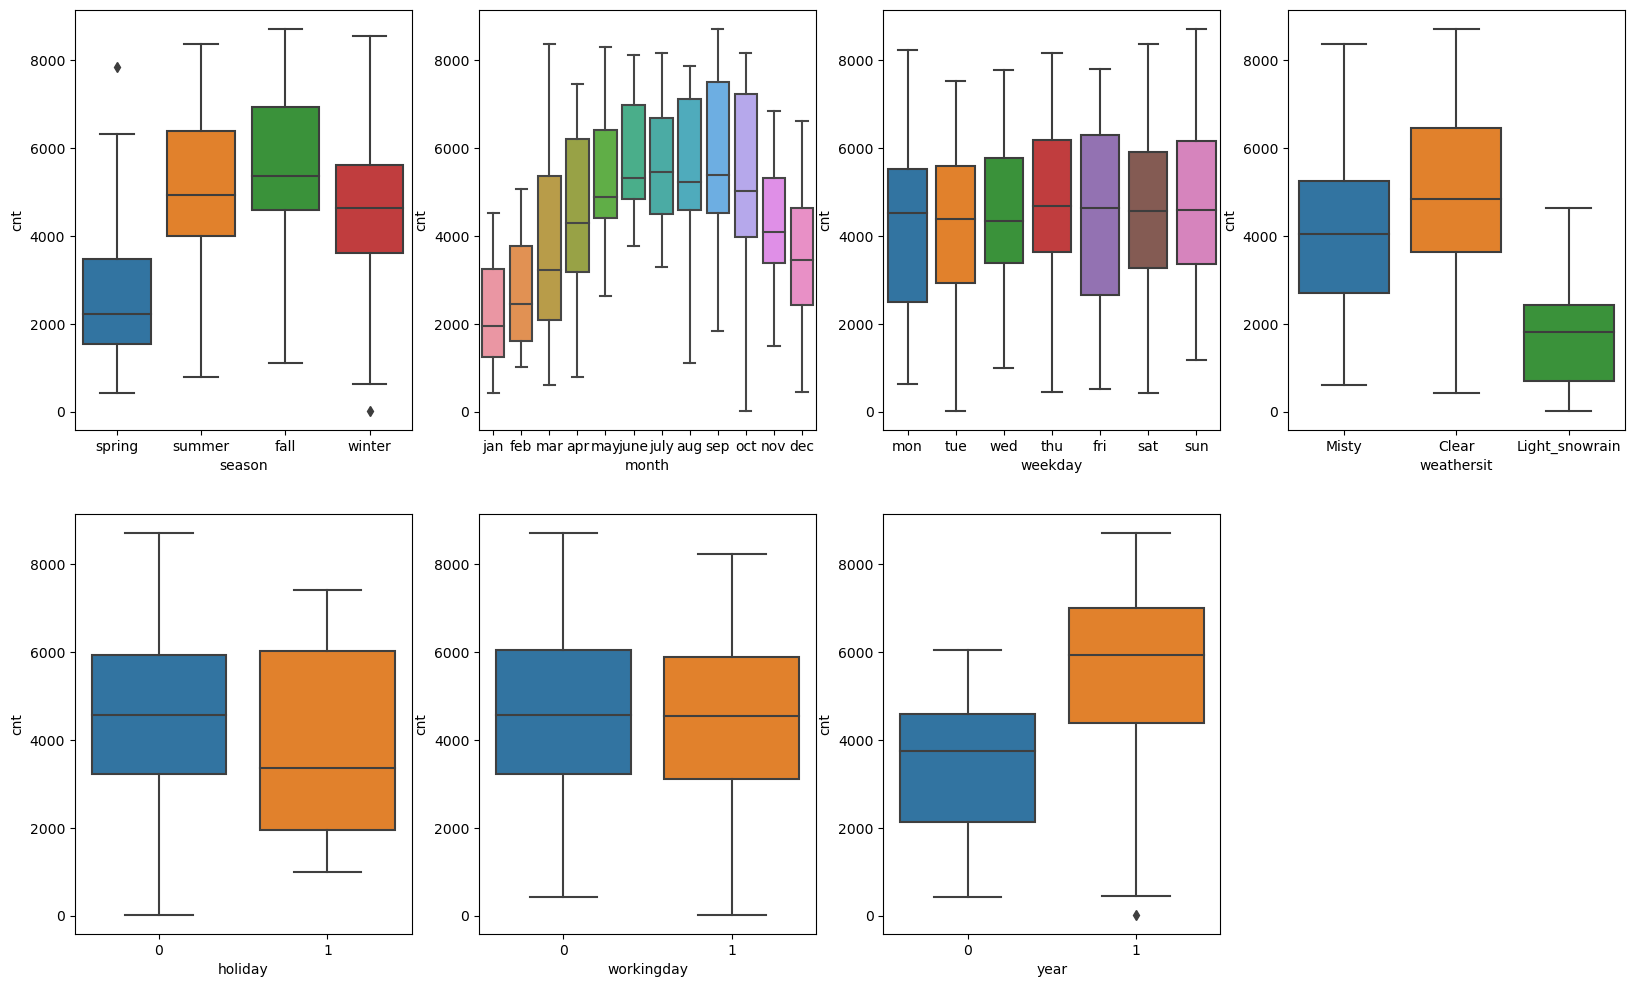

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_new)
plt.show()

Inferences

- Demand increased during the months of `may, june, july`being `highest in months of aug, sep and oct`, this is further bolstered by the fact that boookings have gradually increased from `spring to summer` to `highest in fall` and then decreased

- Demand for each month seems to have `increased from 2018 to 2019`.

- `Clear weather` attracted more demand which seems obvious.

- `Thu, Fir, Sat and Sun` have more demand as compared to the start of the week.

- 2019 saw a `drastic increase` in demand over 2018 which shows progress.

- No visible difference in demands between working and non-working days.


#### Visualizing the numerical columns

<Figure size 640x480 with 0 Axes>

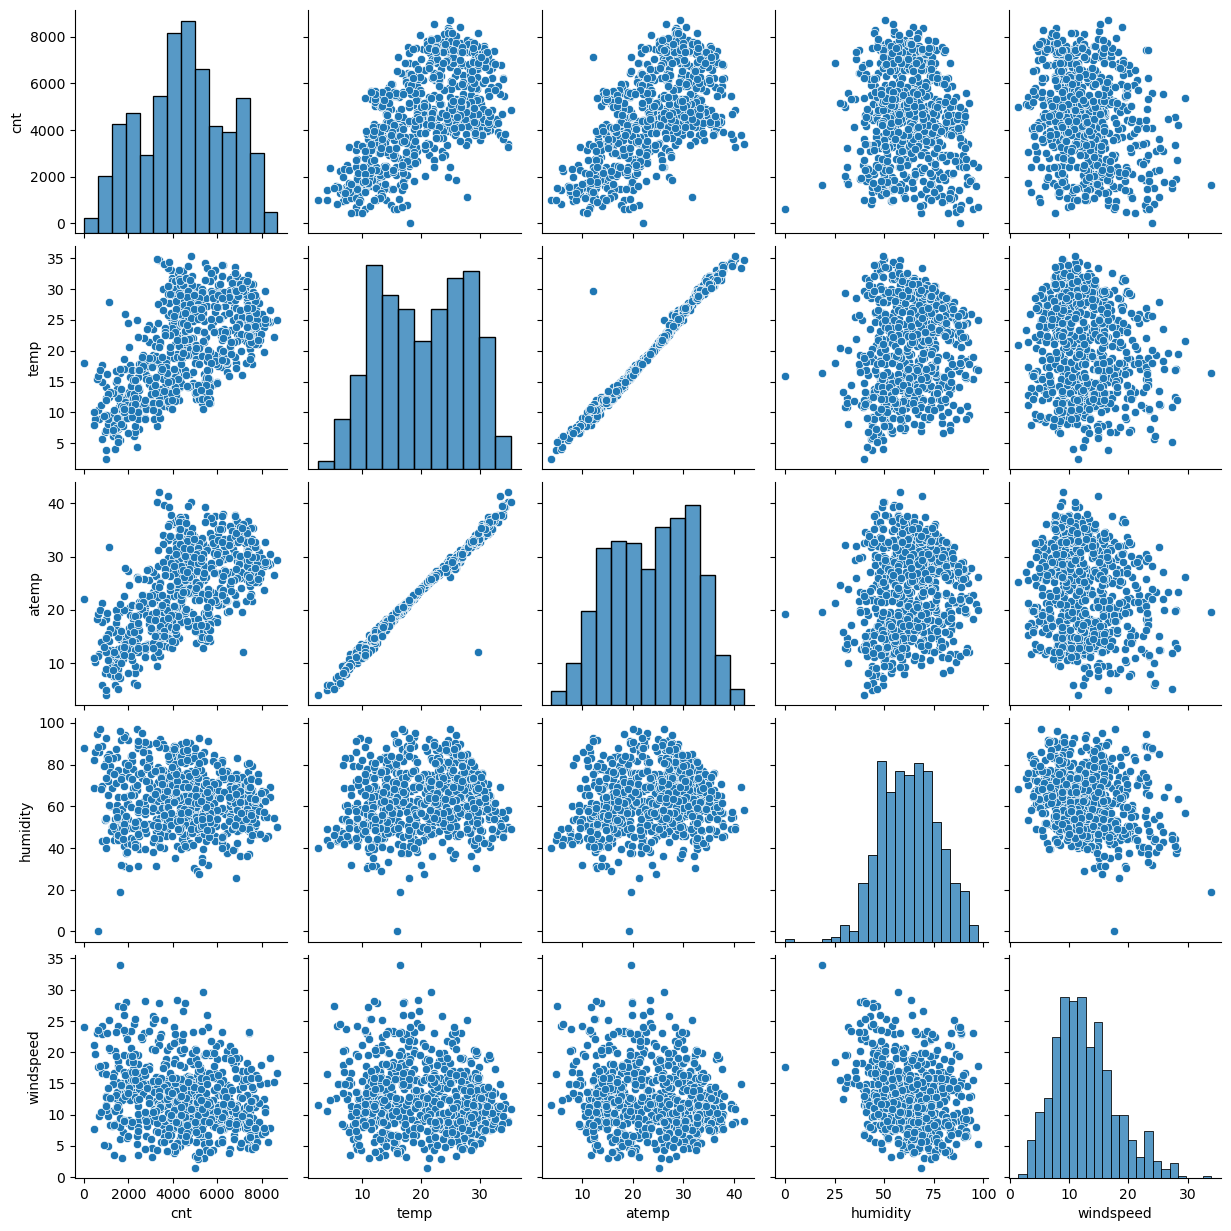

In [18]:
plt.figure()
sns.pairplot(data=bike_new,vars=['cnt','temp','atemp','humidity','windspeed'])
plt.show()

 - Yes We should consider linear regression as there is linear relationship seen between atleast some of the variables with our target variable that is cnt.

### Preparing the data for Modelling

#### Creating Dumy Variables

In [19]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
season_bike_new = pd.get_dummies(bike_new['season'],drop_first = True)
month_bike_new = pd.get_dummies(bike_new['month'],drop_first = True)
weekday_bike_new = pd.get_dummies(bike_new['weekday'],drop_first = True)
weathersit_bike_new = pd.get_dummies(bike_new['weathersit'],drop_first = True)

bike_new = pd.concat([ bike_new , season_bike_new , month_bike_new , weekday_bike_new , weathersit_bike_new] , axis = 1)

In [21]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


- Dropping all the original redundant categorical columns as we have created dummy variables for them.

In [22]:
bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [23]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [24]:
df_train , df_test = train_test_split(bike_new,train_size = 0.7 ,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


Original datset has been split in `train` & `test` datasets, reserving 30 percent of the dataset to test the model that we build.

- train dataset having 510 rows and 30 features.
- test datset having 220 rows and 30 features.

### Rescaling the features using Min-Max scaler.

In [25]:
scaler = MinMaxScaler()

- We only need to scale the numeric objeects leaving the dummy variables.

In [26]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [28]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#####  Let's check the correlation coefficients to see which variables are highly correlated

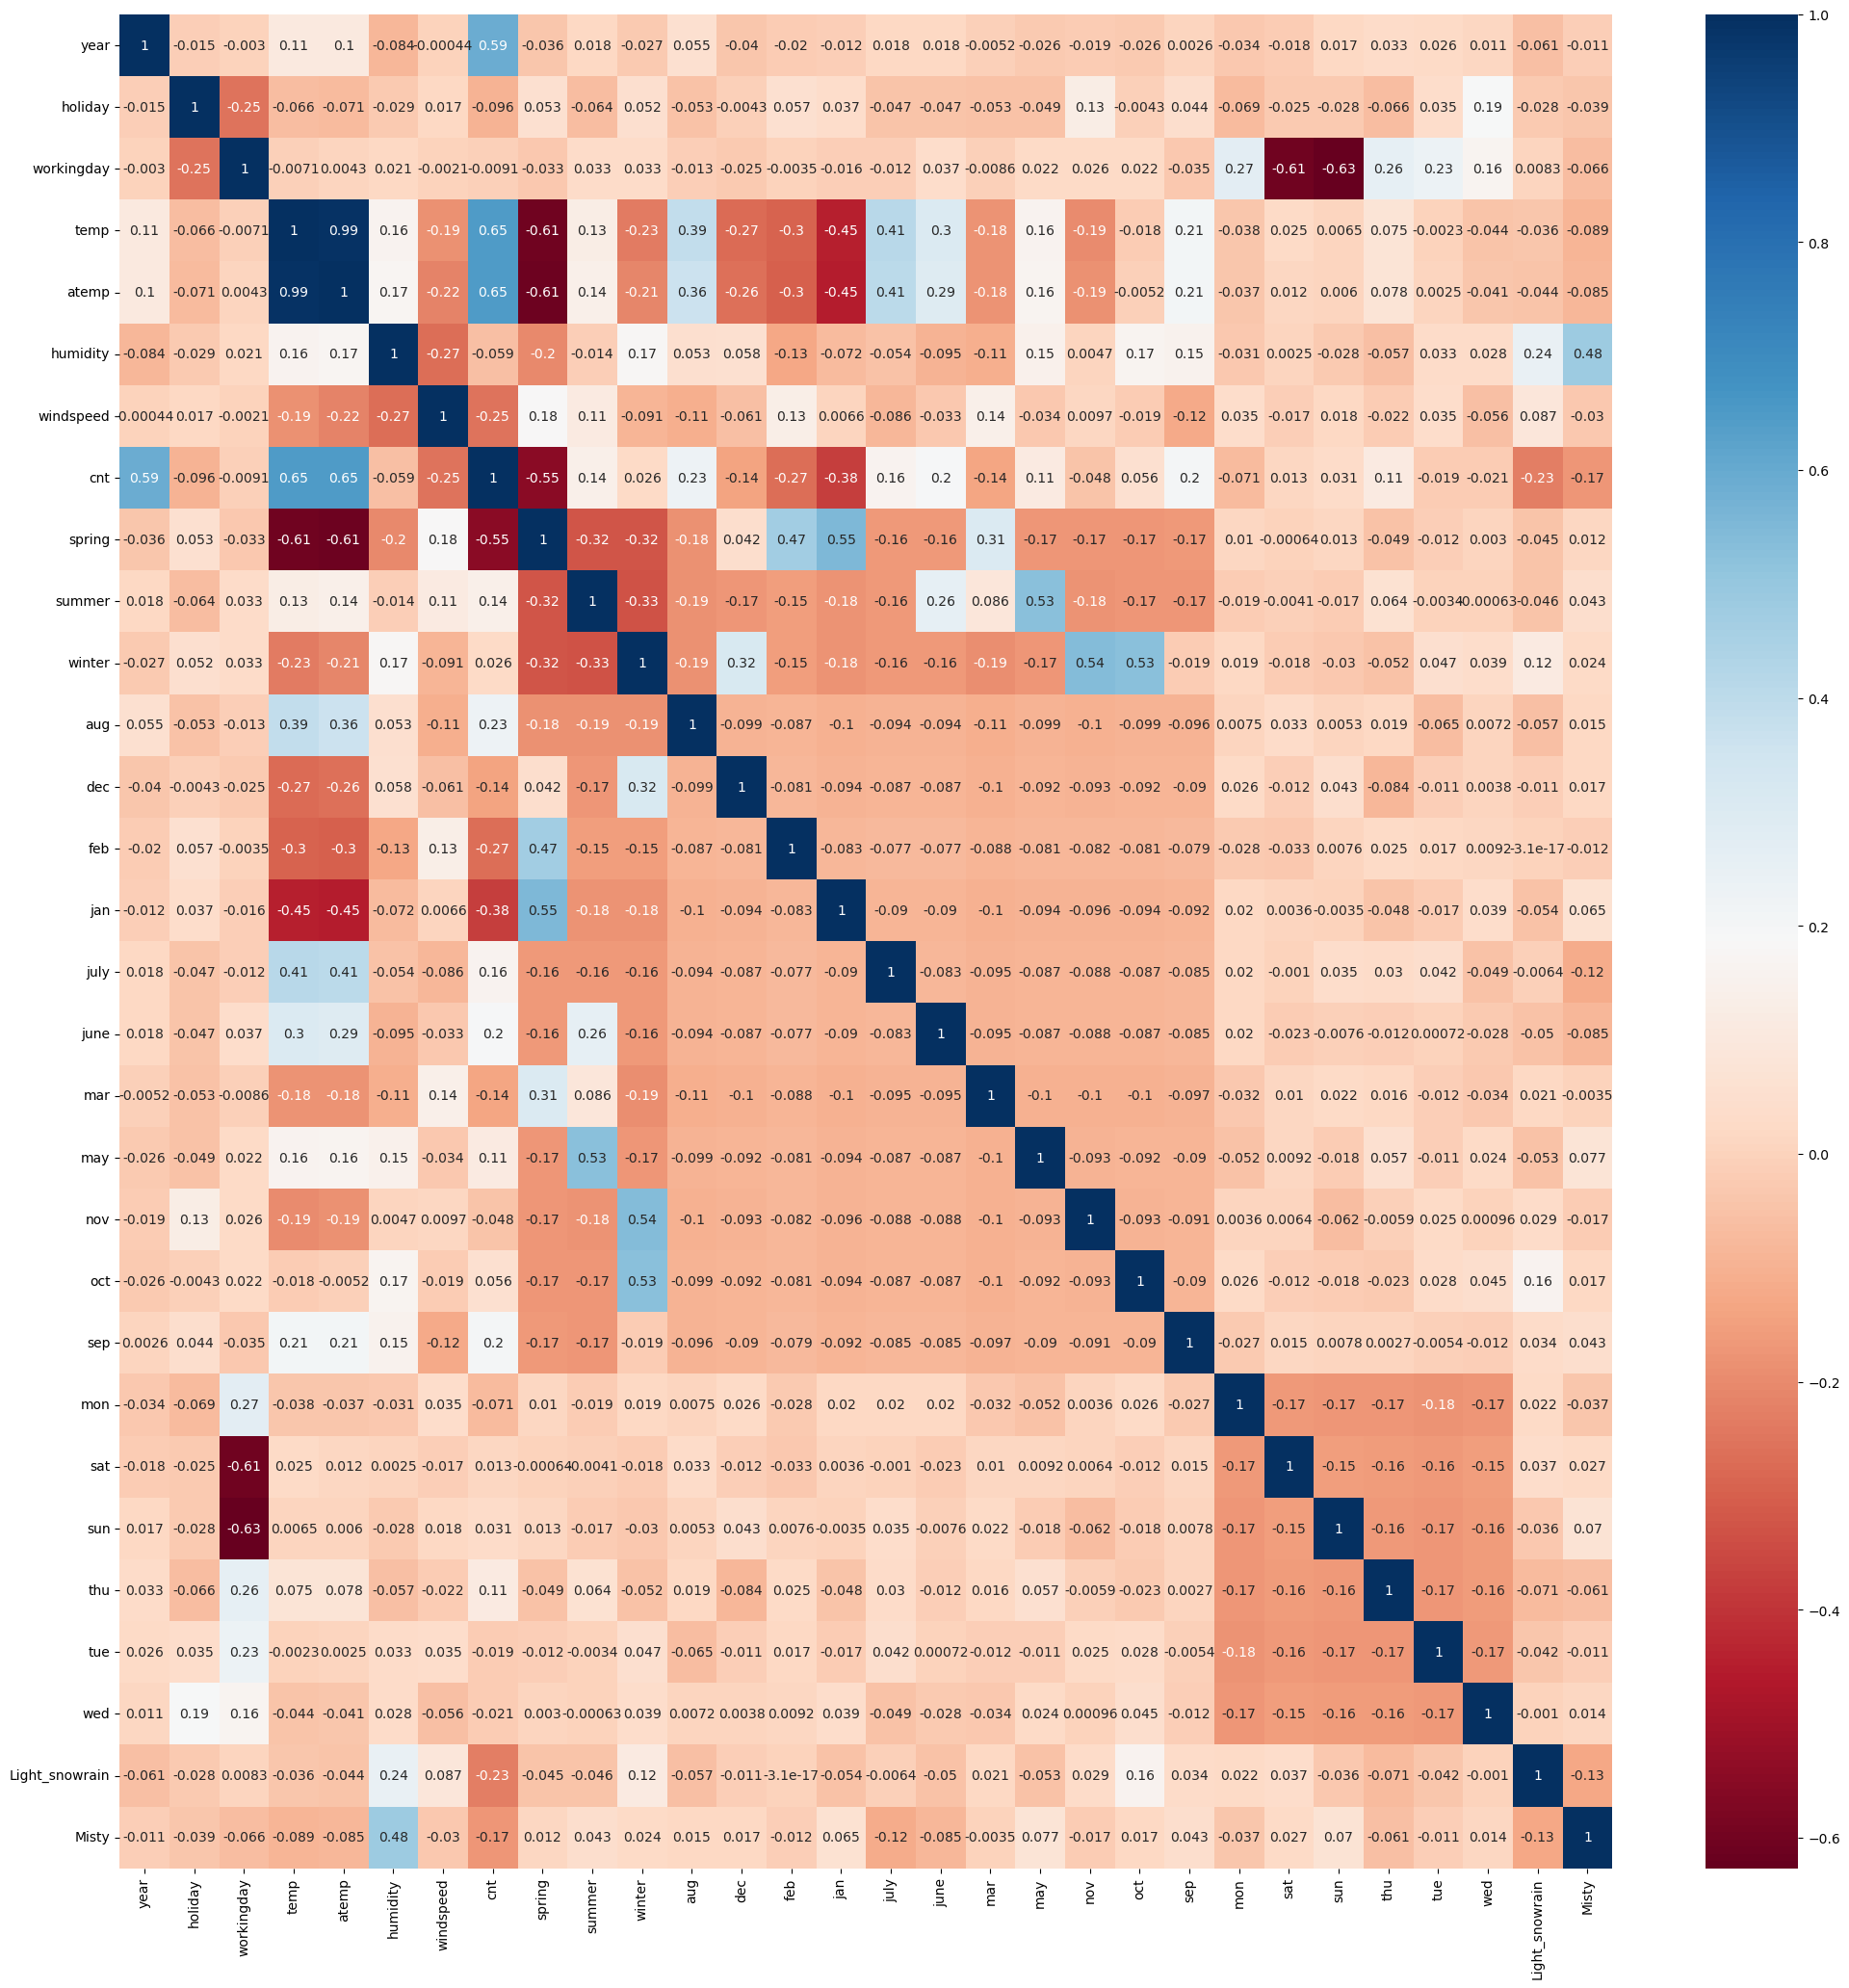

In [29]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

- Traget variable `cnt` seems to have correlation with `year` variable and `temp`. 
- Similarly, `Misty and humidity` show correlation. 
- `Spring season` with `Jan` and `Feb` month and `Summer season` with `may` month and `Winter season` with `oct and nov` month show good correlation.
- Thesre is a strong co-relatrion between `temp` and `atemp` but keeping these variable for further analysis

In [30]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']

Lets see a scatterplot for `cnt` vs `temp`.

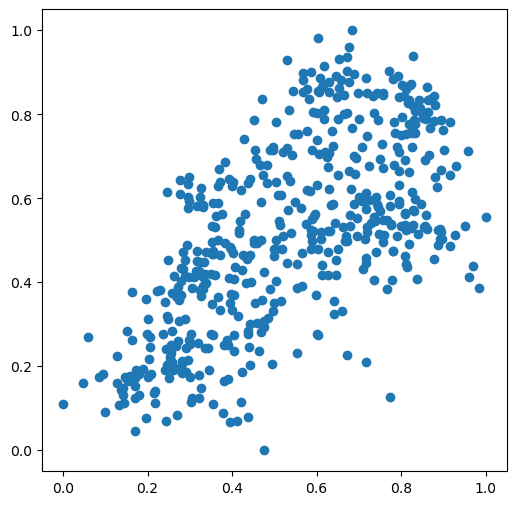

In [31]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

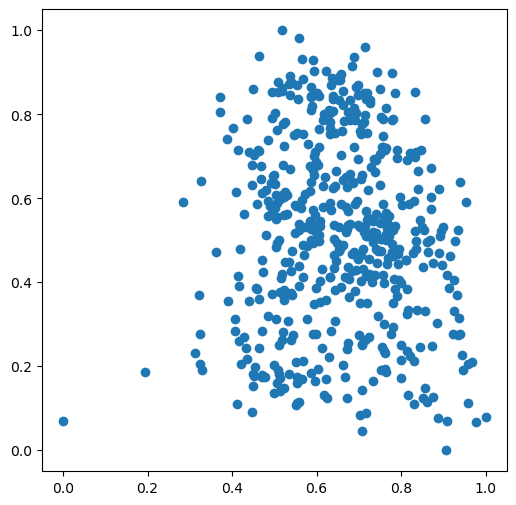

In [32]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.humidity, df_train.cnt)
plt.show()

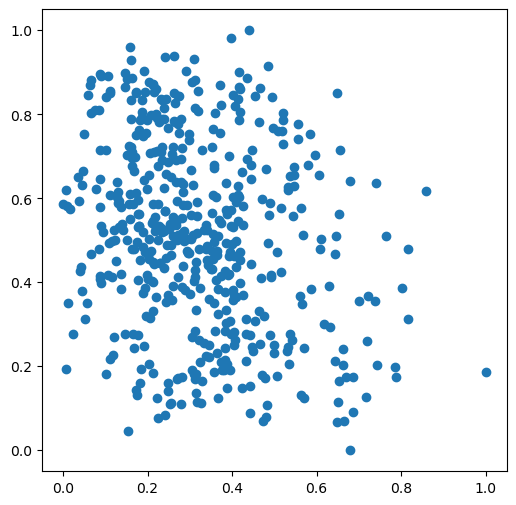

In [33]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.windspeed, df_train.cnt)
plt.show()

### Building the Linear Model using  Recursive Feature Elimination 

In [34]:
# X-train and Y_train just like simple linear regression

y_train = df_train.pop('cnt')
x_train = df_train

In [35]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,  n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train)

In [36]:
list(zip(x_train.columns, rfe.support_ , rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

- Selecting the selected variables in RFE

In [37]:
col = x_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'Light_snowrain',
       'Misty'],
      dtype='object')

In [38]:
# checking which columns has been rejected

x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

## Building Model using Statsmodels for detailed statistics

In [39]:
# creating a dataframe with rfe selected variables

x_train_rfe = x_train[col]

#### 1st LR Model

In [40]:
#adding constant variable

x_train_sm = sm.add_constant(x_train_rfe)

# Fitting the Model
lm = sm.OLS(y_train,x_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          8.15e-189
Time:                        01:41:04   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.859      0.000       0.249       0.391
year               0.2304      0.008     28.487      0.000       0.215       0.246
holiday           -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp               0.4815      0.037     13.005      0.000       0.409       0.554
humidity          -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed         -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer             0.0423      0.015      2.761      0.006       0.012       0.072
winter             0.1019      0.018      5.656      0.000       0.067       0.137
dec               -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan               -0.0434      0.018     -2.393      0.017      -0.079      -0.008
july              -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov               -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep                0.0755      0.017      4.466      0.000       0.042       0.109
Light_snowrain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Misty             -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF to check for multicollinearity.

In [41]:
def calc_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [42]:
calc_VIF(x_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Misty,2.32
0,year,2.09
11,nov,1.85
9,jan,1.75


- We have `RSquared` of `.845` which means `84 percent` of the variance in our target variable is explained by the 15 selected variables
- p-values for all variables are within margin so model can be said to be statistically significant.
- Humidity has a significantly high VIF Value suggesting high multicollinearity so dropping the `humidity` variable

In [43]:
# dropping humidity as it shows high VIF value
x_train_rfe = x_train_rfe.drop(['humidity'], axis = 1)

#### 2nd LR Model

In [44]:
#adding constant variable
x_train_sm = sm.add_constant(x_train_rfe)

# Fitting the Model
lm = sm.OLS(y_train,x_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        01:41:04   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.618      0.000       0.182       0.308
year               0.2345      0.008     28.687      0.000       0.218       0.251
holiday           -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp               0.4387      0.036     12.093      0.000       0.367       0.510
windspeed         -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring            -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer             0.0349      0.015      2.251      0.025       0.004       0.065
winter             0.0869      0.018      4.831      0.000       0.052       0.122
dec               -0.0428      0.018     -2.413      0.016      -0.078      -0.008
jan               -0.0500      0.018     -2.719      0.007      -0.086      -0.014
july              -0.0500      0.019     -2.703      0.007      -0.086      -0.014
nov               -0.0395      0.019     -2.064      0.040      -0.077      -0.002
sep                0.0687      0.017      4.015      0.000       0.035       0.102
Light_snowrain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Misty             -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
calc_VIF(x_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,nov,1.81
8,jan,1.66
9,july,1.59
13,Misty,1.57


- p-values are low except for `nov` 
- Rsquared has marginally gone down
- VIF values have significantly reduced.

In [46]:
# We can drop nov variable for its relatively high p-value
x_train_rfe = x_train_rfe.drop(['nov'], axis = 1)

 #### 3rd LR Model

In [47]:
#adding constant variable
x_train_sm = sm.add_constant(x_train_rfe)

# Fitting the Model
lm = sm.OLS(y_train,x_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.74e-186
Time:                        01:41:04   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.310      0.000       0.167       0.290
year               0.2343      0.008     28.573      0.000       0.218       0.250
holiday           -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp               0.4581      0.035     13.031      0.000       0.389       0.527
windspeed         -0.1594      0.025     -6.291      0.000      -0.209      -0.110
spring            -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer             0.0404      0.015      2.635      0.009       0.010       0.070
winter             0.0774      0.017      4.438      0.000       0.043       0.112
dec               -0.0283      0.016     -1.731      0.084      -0.060       0.004
jan               -0.0451      0.018     -2.467      0.014      -0.081      -0.009
july              -0.0499      0.019     -2.686      0.007      -0.086      -0.013
sep                0.0742      0.017      4.373      0.000       0.041       0.108
Light_snowrain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Misty             -0.0793      0.009     -9.089      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
calc_VIF(x_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,year,2.07
6,winter,2.05
8,jan,1.65
9,july,1.59
12,Misty,1.57
10,sep,1.34


- all `p-values` are low except for `dec`.
- r-sqaured remains unchanged(marginal reduction - .001 )
- VIF doesnt seems to be affected much.

Lets drop dec variable and build the model again 


#### 4th LR Model

In [49]:
# droping dec variable as it has high p-value
x_train_rfe = x_train_rfe.drop(['dec'], axis = 1)

In [50]:
#adding constant variable
x_train_sm = sm.add_constant(x_train_rfe)

# Fitting the Model
lm = sm.OLS(y_train,x_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          8.14e-187
Time:                        01:41:04   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.088      0.000       0.156       0.275
year               0.2343      0.008     28.517      0.000       0.218       0.250
holiday           -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp               0.4721      0.034     13.772      0.000       0.405       0.539
windspeed         -0.1549      0.025     -6.135      0.000      -0.205      -0.105
spring            -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer             0.0434      0.015      2.845      0.005       0.013       0.073
winter             0.0757      0.017      4.335      0.000       0.041       0.110
jan               -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                0.0764      0.017      4.506      0.000       0.043       0.110
Light_snowrain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Misty             -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
calc_VIF(x_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,year,2.07
6,winter,1.78
7,jan,1.61
8,july,1.59
11,Misty,1.56
9,sep,1.34


- Dropping `jan` variable for its high p-value 
- VIF remains unchanged

In [52]:
# droping jan variable as it has high p-value
x_train_rfe = x_train_rfe.drop(['jan'], axis = 1)

#### 5th LR Model

In [53]:
#adding constant variable
x_train_sm = sm.add_constant(x_train_rfe)

# Fitting the Model
lm = sm.OLS(y_train,x_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          5.06e-187
Time:                        01:41:05   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.746      0.000       0.141       0.258
year               0.2336      0.008     28.352      0.000       0.217       0.250
holiday           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp               0.4910      0.033     14.770      0.000       0.426       0.556
windspeed         -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring            -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer             0.0465      0.015      3.051      0.002       0.017       0.076
winter             0.0817      0.017      4.730      0.000       0.048       0.116
july              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep                0.0768      0.017      4.517      0.000       0.043       0.110
Light_snowrain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty             -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
calc_VIF(x_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,july,1.58
10,Misty,1.55
8,sep,1.34
9,Light_snowrain,1.08


-  VIF values have reduced
- July variable has marginally high p-value so droping the var and building model again to observe changes if any

In [55]:
# droping july variable as it has high p-value
x_train_rfe = x_train_rfe.drop(['july'], axis = 1)

#### 6th LR Model

In [56]:
#adding constant variable
x_train_sm = sm.add_constant(x_train_rfe)

# Fitting the Model
lm = sm.OLS(y_train,x_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.47e-186
Time:                        01:41:05   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.447      0.000       0.133       0.249
year               0.2341      0.008     28.237      0.000       0.218       0.250
holiday           -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp               0.4777      0.033     14.423      0.000       0.413       0.543
windspeed         -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring            -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer             0.0621      0.014      4.350      0.000       0.034       0.090
winter             0.0945      0.017      5.630      0.000       0.062       0.127
sep                0.0910      0.016      5.566      0.000       0.059       0.123
Light_snowrain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Misty             -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
calc_VIF(x_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Misty,1.55
7,sep,1.23
8,Light_snowrain,1.08
1,holiday,1.04


In [58]:
lm.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
spring           -0.055406
summer            0.062076
winter            0.094476
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
dtype: float64

- All the p-values are zeroexcept for the lowest being `.008` which almost equals zero so the model is now statistically significant.
- rSquared value is `.833` suggesting 83 percent of variance in `cnt` is explained by the 10 remaining predictor variables.
- VIF values for all variables is below 5 meaning a low correlation between predictor variables.


##### 6th Linear regression model is statistically significant  and has a very low multicollinearity

## Residual Analysis and validation

To validate assumptions of the model, and hence the reliability for inference



#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
x_train_sm

,const,year,holiday,temp,windspeed,spring,summer,winter,sep,Light_snowrain,Misty
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,1


In [60]:
y_train_pred = lm.predict(x_train_sm)
res = (y_train - y_train_pred)

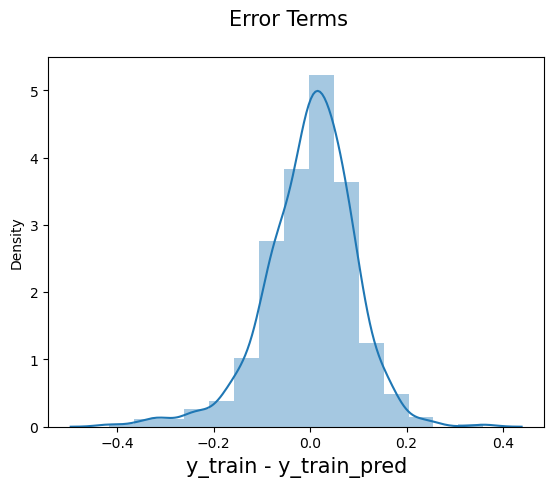

In [61]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

- Error Terms are following a normal distribution.

### Multicollinearity 

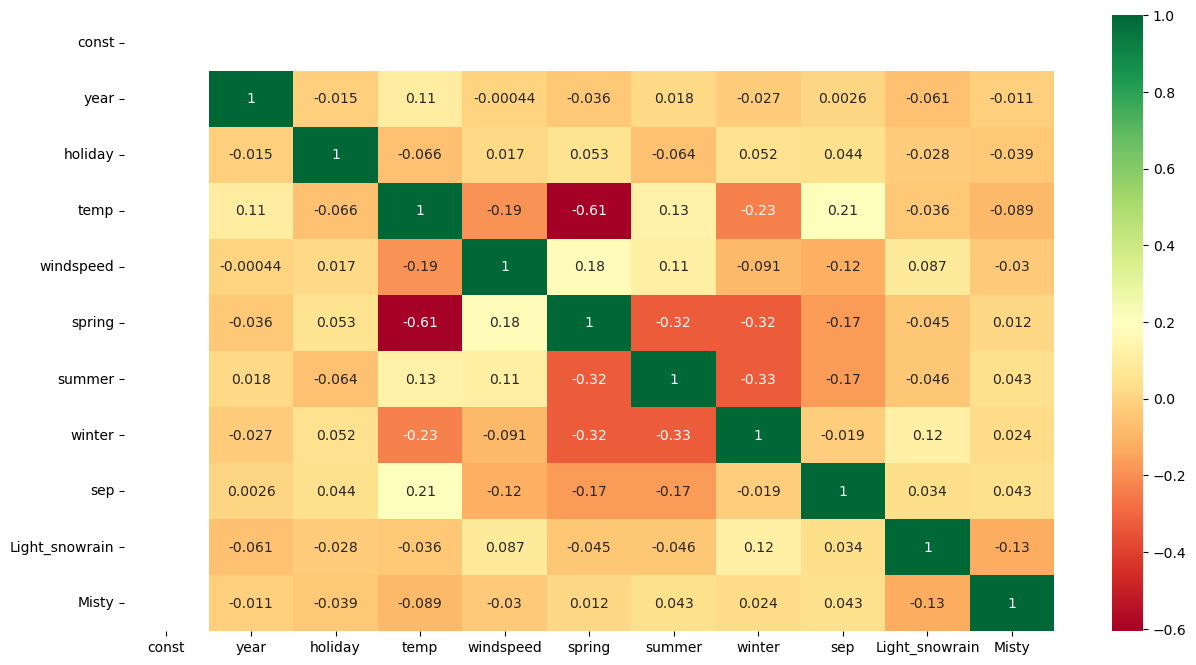

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_sm.corr(),annot = True, cmap="RdYlGn")
plt.show()

- VIF values are less than 5 hence there is no multicolinearity.

### Predictions and Evaluation on the Test set

In [63]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [64]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
y_test = df_test.pop('cnt')
x_test = df_test

In [66]:
col_1 = x_train_rfe.columns

x_test = x_test[col_1]

# Adding constant variable to test dataframe
X_test_6 = sm.add_constant(x_test)

In [67]:
y_test_pred = lm.predict(X_test_6)

In [68]:
r2 = r2_score(y_true = y_test,y_pred =  y_test_pred)
round(r2,4)

0.8038

In [69]:
r2_adjusted = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
r2_adjusted

0.7944

- Rsquared on the `Final train model is 0.83` and rquared onthe `test model is 0.80` 
- Adj. R-squared on the `Final train model is 0.82`and adjusted rquared on the `test model is 0.79`
  rquared onthe `test model is .80`which is very close so we can say that

####  What the model has learnt on the training set, it is also able to generalize very well on the test set.

#### Graph for Actual Vs Predicted Values

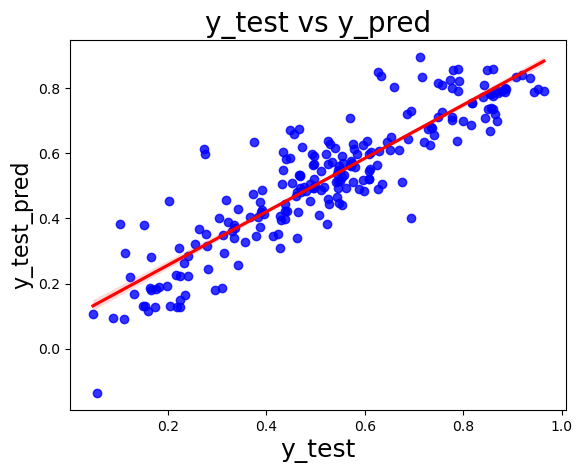

In [70]:
# Visualizing the fit on the test data with a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
   
    - R Squared for the Train dataset           : 0.833
    - R Squared for the Test dataset            : 0.8038
    - Adjusted R Squared for the Train dataset  : 0.82
    - Adjusted R Squared for the Test dataset   : 0.79


#### Demand of bikes depends on following variables
- year
- holiday
- temp
- windspeed
- sep
- Light_snowrain
- Misty
- spring
- summer
- winter.